# 유방암 데이터를 활용하여 Ensemble 모델을 학습해보자
- wisconsin의 유방암 데이터 셋
- 총 569건의 데이터
- 악성(212), 양성(357건)으로 구성

In [1]:
#데이터 셋 불러오기
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
# 딕셔너리 구조에서 데이터 확인 : 키 값들을 확인 keys()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# 분류에 사용할 특성 확인
# 학습에 사용할 데이터의 이름과 개수 확인
print(data.feature_names)
print(len(data.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [4]:
#각 특성들의 자료형 확인
type(data.data)

numpy.ndarray

In [5]:
# 유방암 데이터 셋의 크기 확인
data.data.shape

(569, 30)

In [6]:
# 양성과 악성의 데이터 수 확인
# 동일한 개수로 이루어진 2개 이상의 데이터를 연결하는 함수 :zip()
# zip()==> 양성 : 00 명, 악성: 00명
# 정담 레이블(클래스)의 이름 : target_names - > 양성 or 악성
# 양성, 악성의 수 --> 범주별로 개수를 반환 함수 : bincount()

import numpy as np
for i, j in zip(data.target_names, np.bincount(data.target)):
    print({i : j})

{'malignant': 212}
{'benign': 357}


# 훈련데이터와 테스트데이터로 분리 

In [7]:
from sklearn.model_selection import train_test_split
# 7 : 3

X_train, X_test, y_train, y_test = train_test_split(data.data, # X
                                                   data.target, # y
                                                   test_size=0.3,
                                                   random_state=100)

In [8]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

# RandomForest 모델 적용하기
- 1. 몇개의 트리를 만들지 선택
- 2. 단일 결정트리에서처럼 사전 가지치기 사용 여부 결정

In [9]:
# 필요한 도구(라이브러리) 꺼내오기

from sklearn.ensemble import RandomForestClassifier

#랜덤포레스트 모델 생성, 하이퍼 파라미터 설정
forest_model = RandomForestClassifier(n_estimators=80, random_state=100)

#학습
forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80, random_state=100)

In [10]:
#교차검증으로 평가
from sklearn.model_selection import cross_val_score

cross_val_score(forest_model, X_train, y_train, cv=5).mean()

0.954778481012658

In [11]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pre = forest_model.predict(X_train)
test_pre = forest_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과', train_pre)
print('학습 데이터를 이용한 예측 결과', test_pre)

학습 데이터를 이용한 예측 결과 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0
 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1
 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1
 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1]
학습 데이터를 이용한 예측 결과 [0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1

In [12]:
# 학습 및 테스트 데이터에 대한 분류 모델의 성능 확인 --> 평균 정확도
from sklearn.metrics import accuracy_score

print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pre)))
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pre)))

학습 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.953


# GridSearchCV()를 적용하여 모델의 성능 향상시키기 

In [14]:
# 튜닝할 하이퍼 파라미터 설정
# n_estimators : [50, 80 ,130]
# max_depth : [3,5,7]
# max_leaf_nodes : [2,4,6]
# min_samples_split : [3,5,7]

param = {
    'n_estimators' : [50, 80 ,130],
    'max_depth' : [3,5,7],
    'max_leaf_nodes' : [2,4,6],
    'min_samples_split' : [3,5,7]
    
}

forest_model2 = RandomForestClassifier(random_state=1, n_jobs=-1)
# n_jobs = -1 : 내 컴퓨터의 CPU 성능을 모두 쓰겠다.

#GridSearchCV 모델 객체 생성
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(forest_model2, param, cv=5, scoring = 'accuracy', n_jobs= -1, verbose=3)

#학습
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 80, 130]},
             scoring='accuracy', verbose=3)

In [15]:
# 가장 높은 성능일때의 최적의 하이퍼파라미터 조합 확인
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_split': 5, 'n_estimators': 80}
0.952246835443038


# 모델 완성 및 영향력 높은 특성 확인

In [16]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# 랜덤포레스트 모델 완성하기
best_model = RandomForestClassifier(max_depth= 5,
                                    max_leaf_nodes = 6,
                                    min_samples_split= 5,
                                    n_estimators= 80,
                                   random_state=1)

#학습
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=6, min_samples_split=5,
                       n_estimators=80, random_state=1)

In [20]:
# feature_importances_ 를 이용해 영향력 높은 모델의 특성을 추출
fi = best_model.feature_importances_
print('[feature] \n', fi)

[feature] 
 [0.05728766 0.01312087 0.05847654 0.0550743  0.00337323 0.00419892
 0.06278083 0.10764065 0.00036933 0.00215615 0.02076337 0.0002662
 0.00493794 0.03514797 0.00129405 0.00241678 0.00529324 0.0050417
 0.00107757 0.00127097 0.09105803 0.01114966 0.14230934 0.11310657
 0.00552624 0.01349231 0.0340516  0.13127133 0.00811303 0.00793362]


In [21]:
# 영향력이 높은 모델의 특성의 형태를 데이터 프레임으로 생성하기
# 행 : 특성명, 열 : 특성의 중요도
df1 = pd.DataFrame(fi, index=data.feature_names, columns=['importances'])
df2 = df1.sort_values(by='importances', ascending=False) # 특성의 중요도를 내림차순 정렬

<Axes: >

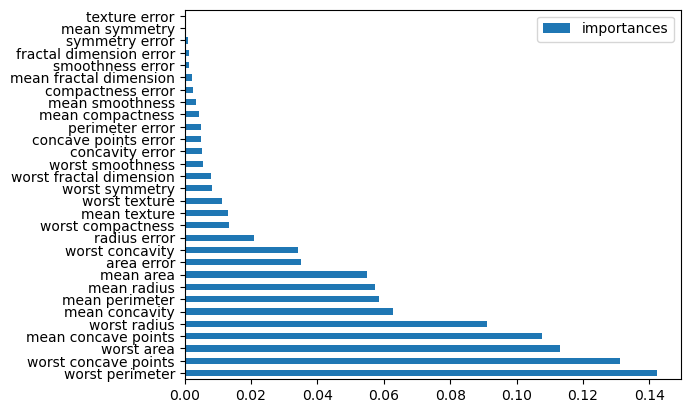

In [22]:
# 데이터프레임의 값을 시각화 : bar차트 - 수평bar차트
df2.plot.barh()

# AdaBoost(Adaptive Boosting) 모델 적용하기
- 결정트리기반이지만, 랜덤포레스트처럼 각각의 트리들이 독립적으로 존재하지 않음
- 사전 가지치기 파라미터를 사용할 수 없음
- learning_rate(학습률) : 가중치 갱신의 변동폭을 조정하는 값, 0~1
    - 값이 클수록 : 과대적합, 값이 작을수록: 과소적합
  

In [25]:
# 모델 라이브러리 불러오기
from sklearn.ensemble import AdaBoostClassifier

#AdaBoost 모델 생성, 하이퍼파라미터 설정
ada_model = AdaBoostClassifier(n_estimators=80, random_state=1)

#학습
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=80, random_state=1)

# GBM(Gradient Boosting Machine) 모델 적용하기
- 여러개의 결정트리를 묶어서 강력한 모델을 만드는 앙상블 방법
- 강력한 사전 가지치기를 적용
- 예측 성능은 높지만 시간이 오래걸리고 과대적합이 빠르게 되는 단점
- max_depth를 작게 설정 --> 5보다 깊어지지 않게 설정하는 게 좋음

In [26]:
# 모델 라이브러리 불러오기
from sklearn.ensemble import GradientBoostingClassifier

#GBM 모델 생성, 하이퍼파라미터 설정X
gbm_model = GradientBoostingClassifier()

#학습
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

# XGBoost 모델 적용하기
- 결정트리 기반의 앙상블 모델에서 가장 각광받고 있는 알고리즘(모델)의 하나
- 분류에 있어서 일반적으로 다른 머신러닝 모델보다 뛰어난 성능을 나타냄
- GBM을 기반으로 하지만, 느린 학습시간--> Early Stopping기능
                                        과대적합의 문제를 해결 --> 규제 포함
- 대규모 머신러닝 문제에 GBM을 적용하려면 XGBoost를 사용

In [30]:
!pip install xgboost

     --------------------------------------- 70.9/70.9 MB 14.5 MB/s eta 0:00:00


In [31]:
#라이브러라 불러오기
from xgboost import XGBClassifier

# XBG 모델 생성
xgb_model = XGBClassifier()

#학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# Light GBM
- XGBoost에 비해 가벼워 속도가 빠른 모델
- 일반적인 GBM(균형트리분할-수평)
    - 왜? 과대적합에 강한구조, 균형을 맞추는데 시간이 필요
- LGBM(비대칭 트리분할 - 수직)
- 학습을 반복할수록 균형트리보다 예측 오류 손실이 최소화

In [32]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 232.3 kB/s eta 0:00:00


In [34]:
import lightgbm

In [35]:
from lightgbm.sklearn import LGBMClassifier

In [36]:
# LGBM 모델 생성
lgbm_model = LGBMClassifier()

#학습
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 255, number of negative: 143
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640704 -> initscore=0.578419
[LightGBM] [Info] Start training from score 0.578419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier()